In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
import numpy as np

### Step 1: Read the dataset

In [ ]:
# 1. Read dataset
df = pd.read_csv("../dataset/Breast_GSE45827.csv")

In [5]:
# Check the shape of the data
df.shape

(151, 54677)

In [9]:
# Change to dataframe
df = pd.DataFrame(df)
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


### Step 2: Preprocess data

In [12]:
df = df.dropna()
df.shape


(151, 54677)

### Step 3: Apply PCA


In [ ]:
# Extracting features
features = df.drop(columns=['samples', 'type'])
features.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,3.368243,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [ ]:
# Standardising features
features_scaled = StandardScaler().fit_transform(features)

In [16]:
# Check whether the normalised data has a mean of zero and a standard deviation of one
np.mean(features_scaled), np.std(features_scaled)

(-4.003724363721795e-18, 0.9999999999999997)

In [17]:
# Convert normalized features into a tabular format
features_cols = ['feature' + str(i) for i in range(features_scaled.shape[1])]

In [18]:
features_scaled = pd.DataFrame(features_scaled, columns=features_cols)
features_scaled.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature54665,feature54666,feature54667,feature54668,feature54669,feature54670,feature54671,feature54672,feature54673,feature54674
146,0.087890,-0.422517,0.969541,-0.966740,0.270313,0.789420,0.425795,-0.706087,0.138680,0.468316,...,0.878921,0.810411,1.236851,1.246391,1.022256,-0.847700,0.024751,-0.710235,0.506787,1.569596
147,0.968212,1.112570,-0.494421,1.256556,0.538607,0.090147,1.987368,1.561670,0.280267,-0.347814,...,0.516424,0.419347,1.056055,1.028890,0.668185,0.967273,0.970445,0.118794,1.444191,0.394075
148,1.125590,-0.640564,0.124128,0.915745,0.136999,1.967392,1.702215,-0.314725,-0.160818,-0.382883,...,-0.324020,-0.440169,0.519279,0.704594,0.853170,1.379349,1.203256,1.792272,0.033398,0.412919
149,0.172542,-0.151619,-0.404831,1.476030,1.255798,-0.065296,-0.267127,1.215861,-0.257451,0.513301,...,-0.118799,-0.259585,0.664286,0.588726,0.357082,1.328744,0.950511,1.074707,1.011573,-0.704646
150,1.646875,-0.358761,-0.518757,0.167826,-0.011569,0.754178,0.110699,-0.833040,-0.003226,2.032668,...,-0.735694,-0.934517,0.205491,0.291847,0.433031,-0.043292,0.288972,1.538632,1.611440,-0.433601


In [24]:
# n_components = 2
pca = PCA(n_components=2)
pca_temp = pca.fit_transform(features_scaled)

In [25]:
# Create a dataframe with the transformed components
df_pca = pd.DataFrame(data=pca_temp, columns=['principal_component_1', "principal_component_2"])

In [26]:
df_pca.tail()

,principal_component_1,principal_component_2
146,68.689831,44.095195
147,15.107800,19.759284
148,50.520502,-2.911367
149,68.928212,27.380156
150,61.932694,24.381700


In [27]:
# Print explained variance ratio (*100 for the percentage of the information held)
pca.explained_variance_ratio_

array([0.1118076 , 0.10185951])

In [32]:
set(df["type"])

{'HER', 'basal', 'cell_line', 'luminal_A', 'luminal_B', 'normal'}

<Figure size 640x480 with 0 Axes>

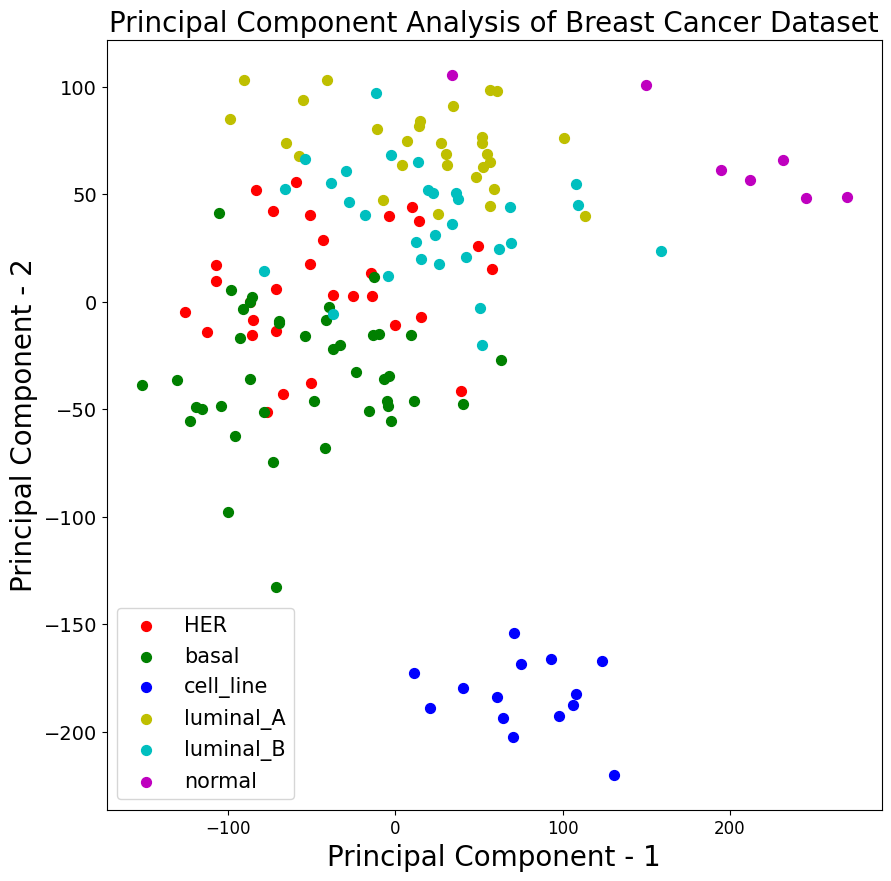

In [34]:
# Plot the visualization
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['HER', 'basal', 'cell_line', 'luminal_A', 'luminal_B', 'normal']
colors = ['r', 'g', 'b', 'y', 'c', 'm']

for target, color in zip(targets,colors):
    indicesToKeep = df['type'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'principal_component_1']
               , df_pca.loc[indicesToKeep, 'principal_component_2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})